In [1]:
import numpy as np
import pymc as pm
import arviz as az
import preliz as pz

In [2]:
np.random.seed(1234)
trials = 4
theta_real = 0.35 # this will be unknown in a real-world experiment 
data = pz.Binomial(n=1, p=theta_real).rvs(trials)
data

array([0, 0, 1, 0], dtype=int64)

In [3]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Binomial('y', n=1, p=theta, observed=data)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

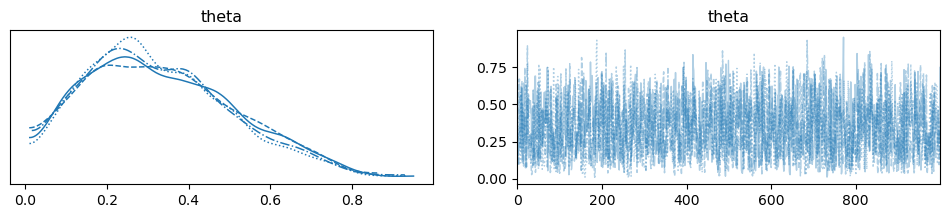

In [4]:
pm.plot_trace(trace)

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

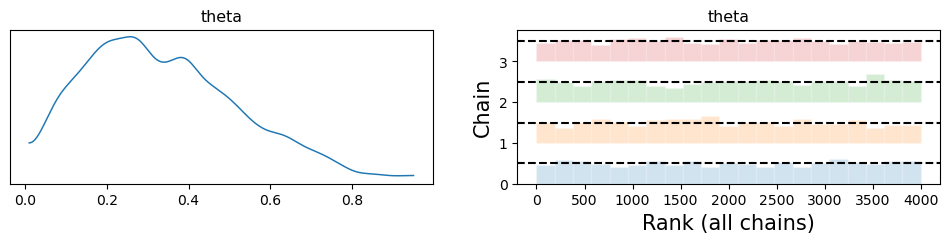

In [5]:
az.plot_trace(trace, kind='rank_bars', combined=True)

In [6]:
az.summary(trace).round(2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.33,0.18,0.03,0.65,0.0,0.0,1586.0,1927.0,1.0


<Axes: title={'center': 'theta'}>

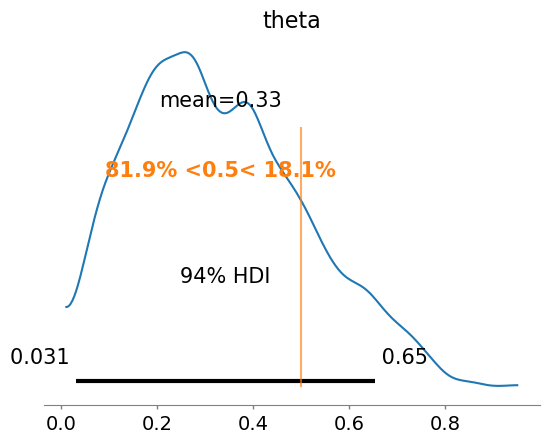

In [7]:
az.plot_posterior(trace, ref_val=0.5)